## Background Knowledge
**Heart Disease, aka Cardiovascular Disease are a group of conditions that affects the Heart and Blood vessels. The conditions can be Coronary artery Disease, heart failure etc.**

**The Coronary artery Disease is the most common type of Heart disease and its caused by the build up of plaques in the arteries that supply blood to the heart. This kind of discomfort is known as Angina and can result to Heart Attack if the flow of Blood to the Heart is blocked completely.**

**Generally, heart failure happens when the heart is unable to pump blood effectively throughout the body, which can lead to symptoms like Shortness of Breath, Fatigue, swelling in the leg or ankles.**

**The risk factors of Heart Disease include High Blood Pressure, High Cholesterol, Smoking, Diabetes, Obesity, sedentary lifestyle and Family history of Heart Disease.**

**Preventive and management measures of heart Disease are Healthy Diet, Regular Exercise, weight and stress management as well as medications and medical procedures.**

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Load Data
names = ["age", "sex", "chestpain", "restbps", "chol", "fbs",
         "restecg", "thalach", "exang", "oldpeak", "slope",
        "v_colored","thal", "health", "X"]
heart_df = pd.read_csv("heart-disease.csv", names = names)
heart_df.head()

,age,sex,chestpain,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,v_colored,thal,health,X
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


### Attributes Explanation
1. age: Age of Patient in years
2. sex: Male or Female field
3. chestpain: Chest Pain Type in full; values could be Typical angina (angina), atypical angina (abnang), non-anginal pain (notang) and asymptomatic (asympt)
    - Chest pain is a symptom that can be caused by wide range of conditions from Benign causes like Muscle Strain to serious Medical emergencies like **HEART ATTACK**. This pain may feel like Pressure, squeezing, burning or aching in the Chest or upper abdomen.
4. restbps: Resting Blood Pressure in mmHg
    - Resting Blood Pressure is the measurement of Blood Pressure when a person is at Rest; usually while sitting or lying down. A normal Resting Blood Pressure is generally considered to be less than 120/80 mmHg
5. chol: Serun Cholestoral in mg/dl
    - Cholesterol is a Waxy substance that is found in the blood and is an essential componenent of the Cell membranes.
6. fbs: Fasting Blood Sugar > 120mg/dl
    - This is the level of Glucose in the Body after an Overnight fast of atleast 8 hours.
7. restecg: Resting Electrocardiographic results; values could be Normal(norm),Abnormal (abn) and Hypertrophy (hyp)
    - This is a non-invasive test that measures the electrical activity of the heart while the patient is at rest.
8. thalach: Maximum heart rate achieved
    - It is the highest heart rate a person can achieve during exercise. It is typically calculated as 220 minus the person's age, but can vart based on Factors like Fitness level, meducation etc. This factor doesn't affect the chances of someone having heart disease; but is an important measure of Cardiovascular fitness; Hence, won't be used for making predictions
9. exang: This is exercise induced angina; value could be True (true) or False(fal)
    - aka Stable Angina is a type of chestpain that occurs during physical activities.
10. oldpeak: This is depression induced by exercise relative to rest
    - aka ST depression is a special feature observed on an Electrocardiogram that reflects a certain type of abnormality in the heart's electrical activity.
11. slope: The slope peak exercise ST segment; values could be upsloping (up), flat (flat) and downsloping (down).
    - This is the slope of the ST segment on an ECG.
12. v_colored: Number of vessels (0-3) colored by fluorosopy
13. thal
14. health: Buff means healthy and Sick means unhealthy.

## Exploratory Data Analysis

In [3]:
# Get shape of Dataset

print("Shape of DataFrame", heart_df.shape)

Shape of DataFrame (303, 15)


In [4]:
heart_df = heart_df.replace("?", np.nan)

# See informations about Non-null and Data-types of heart_df
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    object 
 2   chestpain  303 non-null    object 
 3   restbps    303 non-null    float64
 4   chol       303 non-null    float64
 5   fbs        303 non-null    object 
 6   restecg    303 non-null    object 
 7   thalach    303 non-null    float64
 8   exang      303 non-null    object 
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    object 
 11  v_colored  298 non-null    object 
 12  thal       301 non-null    object 
 13  health     303 non-null    object 
 14  X          303 non-null    object 
dtypes: float64(5), object(10)
memory usage: 35.6+ KB


In [5]:
## Change v_colored to a numeric field
heart_df["v_colored"] = pd.to_numeric(heart_df["v_colored"])

In [6]:
# See informations about Null values

heart_df.isnull().sum()

age          0
sex          0
chestpain    0
restbps      0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
v_colored    5
thal         2
health       0
X            0
dtype: int64

In [7]:
# Drop null values
heart_df.dropna(inplace = True)
print("No null values and all dtypes are in place")

No null values and all dtypes are in place


## Descriptive Analysis

In [8]:
print("Descriptive Stats")
heart_df.describe()

Descriptive Stats


,age,restbps,chol,thalach,oldpeak,v_colored
count,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122,0.679054
std,9.059471,17.72662,51.977011,22.970792,1.166474,0.939726
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000,0.000000
75%,61.000000,140.00000,275.250000,166.000000,1.650000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,3.000000


## Visualization

<AxesSubplot:xlabel='health', ylabel='count'>

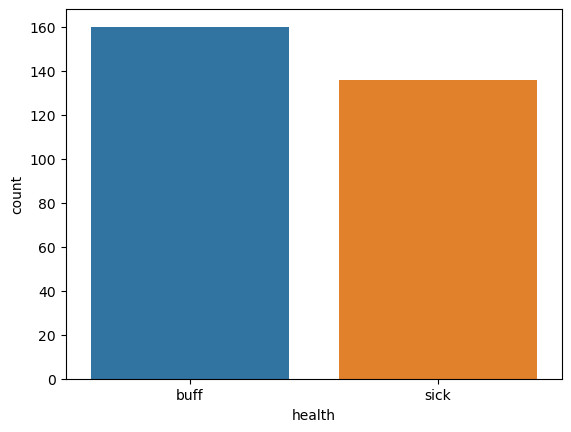

In [9]:
## See Health Distribution
sns.countplot(x = heart_df["health"])

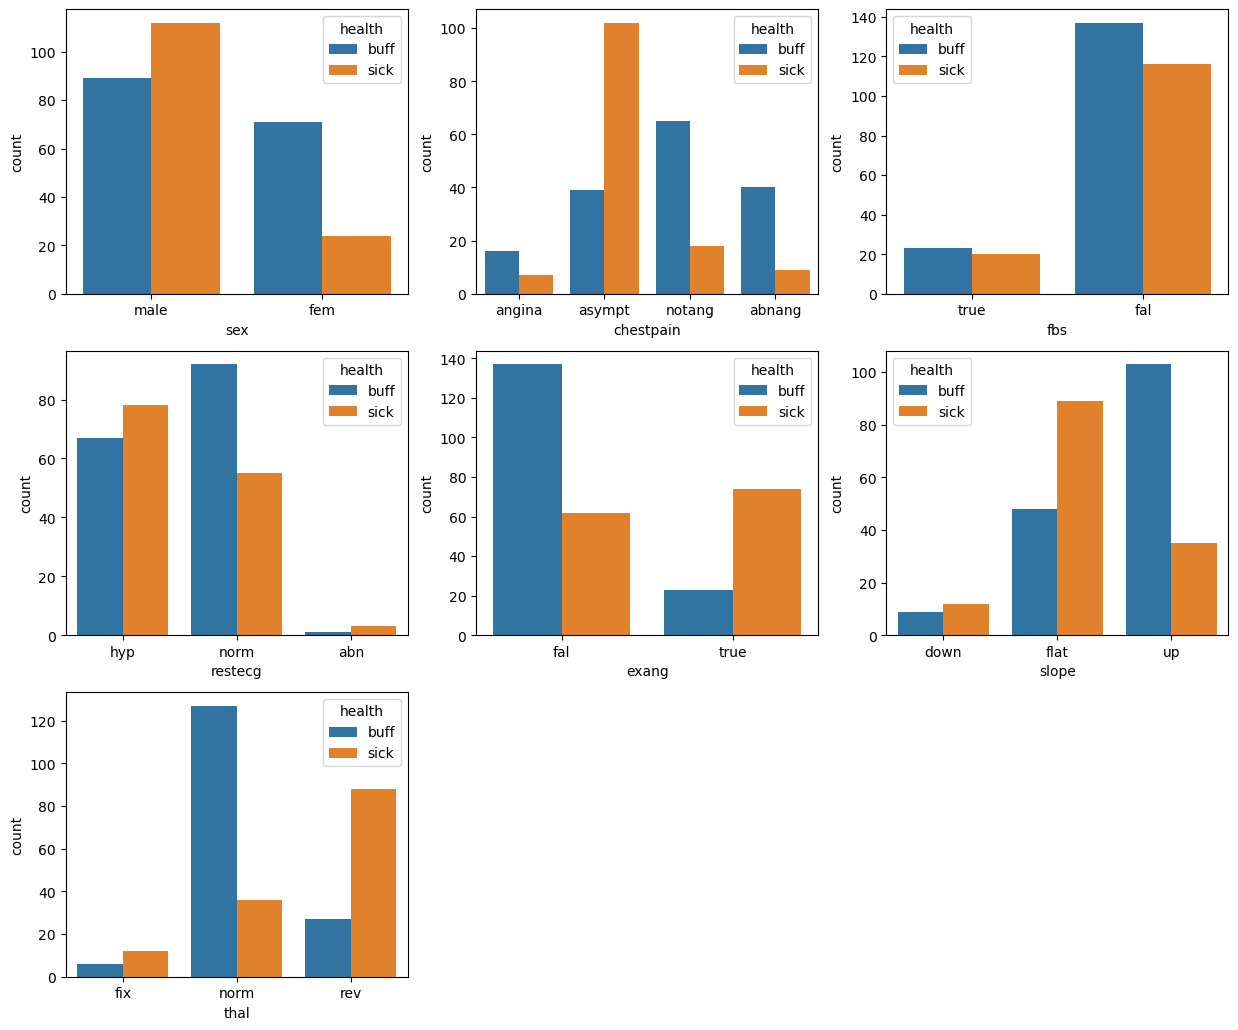

In [10]:
## See Distribution of Categorical data's with respect to health
categories = ["sex", "chestpain", "fbs", "restecg", "exang","slope", "thal"]
pt.figure(figsize = (15,17))
for category in enumerate(categories):
    pt.subplot(4,3, category[0] + 1)
    sns.countplot(x = category[1], hue = "health", data = heart_df)
    

### Observations
1. The Males are more prone to Heart attack than the females
2. Patients with asympt (asymptomatic) chestpain are more prone to Heart attack and patients with abnang (atypical angina) are less likely to have this attack.
3. The abn (abnormal) Resting Electrocardiographic results is rare to find in Patients...
4. Patients with Normal thal are mostly safe from Heart arracks


## Age Distribution with respect to health
First, create a new column; convert the ages into ranges (0-10), (11-20), (21-30) and so on...

In [11]:
bin_ranges = [25, 30,35, 40,45, 50,55, 60,65, 70,75, 80]
heart_df["Age range"] = pd.cut(np.array(heart_df["age"]), bins = bin_ranges)

<AxesSubplot:xlabel='Age range', ylabel='count'>

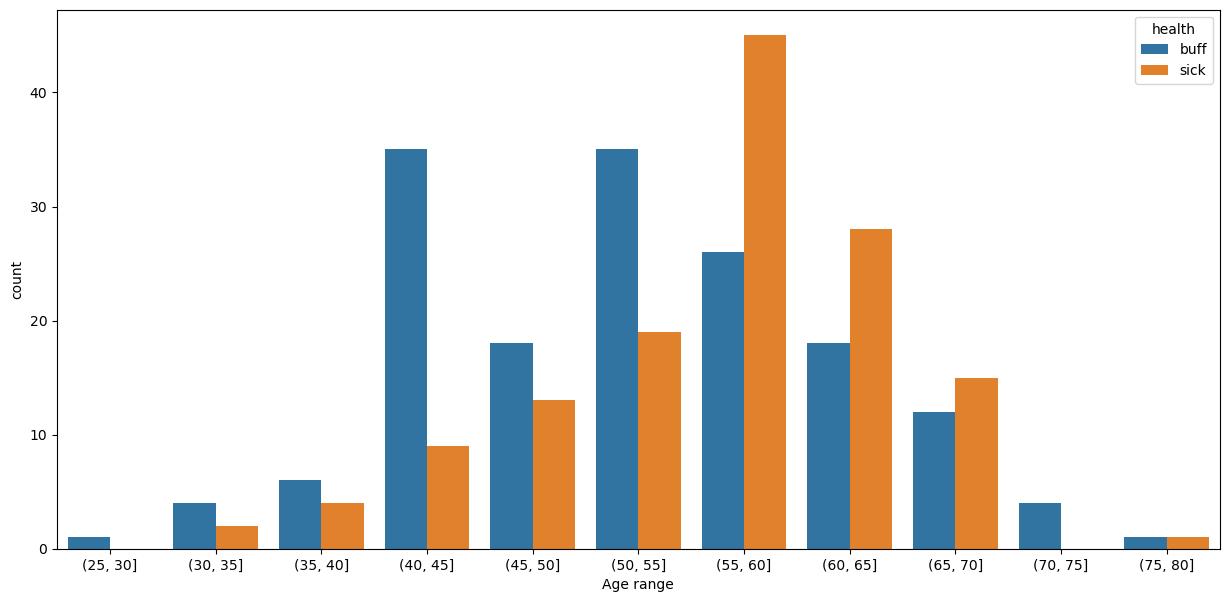

In [12]:
pt.figure(figsize=(15,7))
sns.countplot(x = "Age range", hue="health", data = heart_df)

### Observation
1. Average individuals from age 25-40 have higher chances of being affected by heart problems.
2. Old patients from 55 downwards have higher chances of getting heart attacks...

<AxesSubplot:>

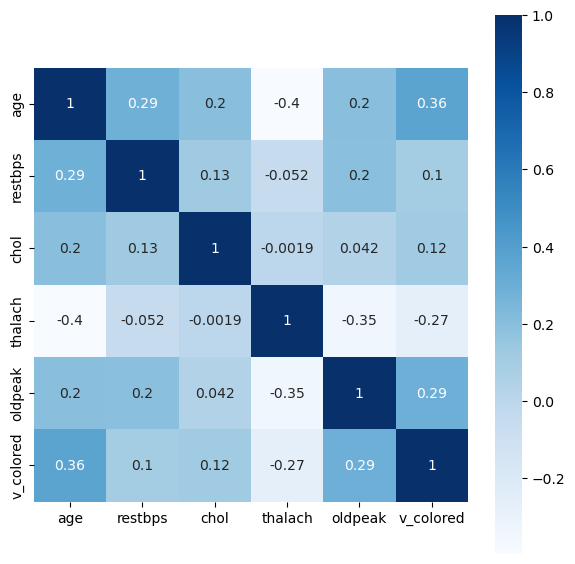

In [13]:
pt.figure(figsize = (7,7))
sns.heatmap(heart_df.corr(), annot = True, cmap="Blues", square=True)

Most attributes have weak or no correlations with each other
- v_colored and age have the highest positive correlation (.36) while thalach and v_colored have the highest negative corrlation (-.35)

In [14]:
# Categorical Data - categories
## Converting all Categorical Data to numeric using Label Encoder
categories.append("health")
save_categories_code = []
def map_category():
    for category in categories:
        encoder = LabelEncoder()
        name = encoder.fit_transform(heart_df[category])
        name_mapping ={index: label for index, label in enumerate(encoder.classes_)}
        save_categories_code.append(name_mapping)
        heart_df[category] = name
map_category()

In [15]:
heart_df.head()

,age,sex,chestpain,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,v_colored,thal,health,X,Age range
0,63.0,1,1,145.0,233.0,1,1,150.0,0,2.3,0,0.0,0,0,H,"(60, 65]"
1,67.0,1,2,160.0,286.0,0,1,108.0,1,1.5,1,3.0,1,1,S2,"(65, 70]"
2,67.0,1,2,120.0,229.0,0,1,129.0,1,2.6,1,2.0,2,1,S1,"(65, 70]"
3,37.0,1,3,130.0,250.0,0,2,187.0,0,3.5,0,0.0,1,0,H,"(35, 40]"
4,41.0,0,0,130.0,204.0,0,1,172.0,0,1.4,2,0.0,1,0,H,"(40, 45]"


In [16]:
save_categories_code

[{0: 'fem', 1: 'male'},
 {0: 'abnang', 1: 'angina', 2: 'asympt', 3: 'notang'},
 {0: 'fal', 1: 'true'},
 {0: 'abn', 1: 'hyp', 2: 'norm'},
 {0: 'fal', 1: 'true'},
 {0: 'down', 1: 'flat', 2: 'up'},
 {0: 'fix', 1: 'norm', 2: 'rev'},
 {0: 'buff', 1: 'sick'}]

**Keys of Categorical Data**

In [17]:
for i in list(zip(categories, save_categories_code)):
    print(i, "\n")

('sex', {0: 'fem', 1: 'male'}) 

('chestpain', {0: 'abnang', 1: 'angina', 2: 'asympt', 3: 'notang'}) 

('fbs', {0: 'fal', 1: 'true'}) 

('restecg', {0: 'abn', 1: 'hyp', 2: 'norm'}) 

('exang', {0: 'fal', 1: 'true'}) 

('slope', {0: 'down', 1: 'flat', 2: 'up'}) 

('thal', {0: 'fix', 1: 'norm', 2: 'rev'}) 

('health', {0: 'buff', 1: 'sick'}) 



## Feature Scaling

**Using Standard Scaler**

In [18]:
ss = StandardScaler()

In [19]:
columns = ["age", "restbps", "chol", "thalach", "oldpeak"]
def scale(data):
    for column in columns:
        data[column]  = ss.fit_transform(data[[column]])

In [20]:
# Transform
scale(heart_df)

In [21]:
heart_df.head(2)

,age,sex,chestpain,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,v_colored,thal,health,X,Age range
0,0.937219,1,1,0.756938,-0.272801,1,1,0.019152,0,1.065587,0,0.0,0,0,H,"(60, 65]"
1,1.379493,1,2,1.604556,0.748607,0,1,-1.812353,1,0.378598,1,3.0,1,1,S2,"(65, 70]"


## Train and Test

In [22]:
X = heart_df.drop(["health", "X", "Age range", "thalach"], axis = 1)
y = heart_df.health

## Cross Validation - Model Selection

### Initialize Models

In [23]:
models = [LogisticRegression(), SVC(kernel="linear"), DecisionTreeClassifier(), RandomForestClassifier()]

In [24]:
def __cross_val__():
    for model in models:
        cross_val = cross_val_score(model,X, y, cv = 5)
        mean_cross_val = sum(cross_val)/len(cross_val)
        
        print("Accuracy Scores for", model , " = ", cross_val)
        print("Mean Accuracy Score for", model , "  = ", mean_cross_val, "\n")
__cross_val__()

Accuracy Scores for LogisticRegression()  =  [0.75       0.86440678 0.76271186 0.77966102 0.77966102]
Mean Accuracy Score for LogisticRegression()   =  0.7872881355932204 

Accuracy Scores for SVC(kernel='linear')  =  [0.75       0.84745763 0.79661017 0.76271186 0.76271186]
Mean Accuracy Score for SVC(kernel='linear')   =  0.7838983050847457 

Accuracy Scores for DecisionTreeClassifier()  =  [0.8        0.76271186 0.66101695 0.69491525 0.77966102]
Mean Accuracy Score for DecisionTreeClassifier()   =  0.7396610169491525 

Accuracy Scores for RandomForestClassifier()  =  [0.83333333 0.93220339 0.77966102 0.76271186 0.79661017]
Mean Accuracy Score for RandomForestClassifier()   =  0.8209039548022599 



## Using Best Model - Random Forest Classifier

In [25]:
rfc = RandomForestClassifier()

In [26]:
# Train Model
rfc.fit(X, y)

RandomForestClassifier()

### Model Evaluation

In [27]:
# Accuracy Score
print("Accuracy Score = ",np.round(rfc.score(X, y)* 100,3), "%")

Accuracy Score =  100.0 %


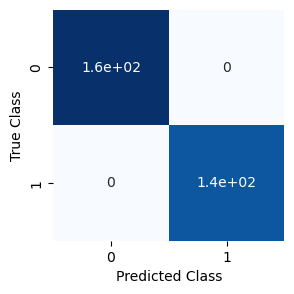

In [28]:
## Confusion Matrix
y_pred = rfc.predict(X)
cm = confusion_matrix(y, y_pred)
pt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, square=True, cbar=False,  cmap="Blues")
pt.xlabel("Predicted Class")
pt.ylabel("True Class")

pt.show()

0 is healthy and 1 is Sick.<br>
The are 0 + 0 = 51 misclassifications.

## Conclusion

**In conclusion, I developed a Machine Learning Model to Predict whether or not a person has Hypertension or not using Medical Conditions like Chest pain Type, Resting Blood Pressure, Fasting Blood Sugar, Resting Electrocardiographic results etc. and other features of a person like Age and Sex.**

**I first explored the preprocessed data by removing missing values, transforming categorical features to numerical and lastly.**

**Then, I visualized and the following are the trends I discovered**
1. **The Males are more prone to Heart diseases than the females**
2. **Patients with asympt (asymptomatic) chestpain are more prone to Heart diseases and patients with abnang (atypical angina) are less likely to have this attack.**
3. **The abn (abnormal) Resting Electrocardiographic results is rare to find in most Patients...**
4. **Patients with Normal thal are mostly safe from Heart attacks**
5. **Average individuals from age 25-40 have higher chances of being affected by heart problems.**
6. **Old patients from 55 downwards have higher chances of getting heart attacks...**

**I scaled the non-categorical features to make all values be in the same range**

**Then, I trained and evaluated several models like Logistic Regression, Supported Vector Classifier, Decision Tree Classifier, Random Forest Classifier using Cross Validation to obtain Average Accuracies of the different Models.** 

**Based on the Average Accuracy scores, I selected Random Forest Classifier as the best performing Model with an average Cross Val Score of 82.77 an accuracy of 100%.**
**Finally, I plotted an Heatmap using the Seaborn Module to show the Confusion Matrix of the prredictions.**
**The Confusion Matrix shows the following**
1. **Of all 160 People that are Healthy;**
    - **140 People we're classified as Healthy - True Positive**
    - **0 were misclassified as Non-healthy - False Negative**
2. **Of all 136 that are non Healthy;**
    - **110 were misclassified as Healthy - False Positive**
    - **0 were Classified as Non-healthy - True Negative**
    
This project can be used in Hospitals and People to  make them aware of their health status.